# 1.1 Linear Regression

给定数据集$ \boldsymbol X $，样本由$ d $个属性描述，此时我们试图学得 
$
    f(\boldsymbol {x_i})=\boldsymbol w^T\boldsymbol {x_i}+b
$
使得$ f(\boldsymbol x_i) \backsimeq \boldsymbol {y_i} $，即
$$
\boldsymbol {y}=\boldsymbol X\boldsymbol {w}+\boldsymbol b +\boldsymbol \epsilon
$$

导入相关依赖

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

定义可视化函数

In [2]:
def draw(X, y, w=None, b=None):
    # 创建三维坐标系
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # 绘制数据点
    ax.scatter(X[:, 0], X[:, 1], y, c='b', marker='o', label='Data points')
    
    if not w is None and not b is None:  
        # 为绘制平面生成网格点
        x1_surf, x2_surf = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 10), 
                                     np.linspace(X[:, 1].min(), X[:, 1].max(), 10))

        # 计算平面上点的预测值
        y_surf = w[0] * x1_surf + w[1] * x2_surf + b

        # 绘制拟合平面
        ax.plot_surface(x1_surf, x2_surf, y_surf, color='r', alpha=0.5, label='Fitted plane')

        # 设置坐标轴标签
        ax.set_xlabel('x_1')
        ax.set_ylabel('x_2')
        ax.set_zlabel('y')

    # 显示图形
    plt.show()


生成随机数据集

In [3]:
# 设置随机种子
np.random.seed(42)

# 生成100个样本，2个特征
X = np.random.rand(100, 2)
# 真实的回归系数
weight = np.array([2.5, -1.7])
b = 1
# 生成目标变量，添加一些噪声
y = X.dot(weight) + b + np.random.normal(0, 0.5, 100)


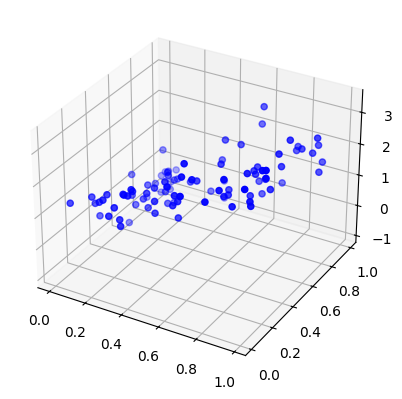

In [4]:
draw(X, y)

## 1. 调用库函数求解线性回归

In [5]:
from sklearn.linear_model import LinearRegression

# 使用库函数
model_1 = LinearRegression()
model_1.fit(X, y)
w_1, b_1 = model_1.coef_, model_1.intercept_

# 打印回归系数
print("调用库函数的回归系数：", w_1, b_1)


调用库函数的回归系数： [ 2.66933339 -1.52252698] 0.8861361320508515


绘制拟合平面：

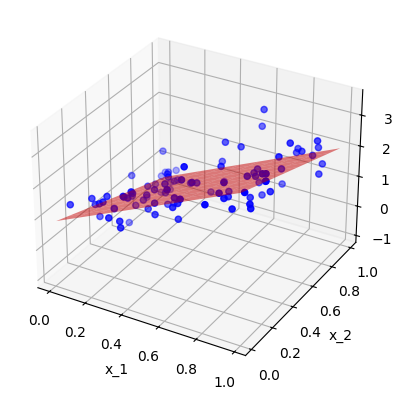

In [6]:
draw(X, y, w_1, b_1)

## 2. 最小二乘法求闭式解
记$X' = (X; 1), w' = (w; b)$，则预测值可写为
$$
\widehat y = \boldsymbol X'\boldsymbol w'
$$
求解目标为优化（最小化）以下目标函数：
$$
L(\boldsymbol w) = \sum^m_{i=1}({y_i}-{\hat{y}_i})^2 = (\boldsymbol y - \boldsymbol{X'}\boldsymbol {w'})^T(\boldsymbol{y} - \boldsymbol{X'}\boldsymbol{w'})
$$
易证$L(\boldsymbol w')$为下凸函数，可对$\boldsymbol w'$求导并使其为0:
$$
\frac{\partial{L(\boldsymbol {w'})}}{\partial\boldsymbol {w'}} = -2\boldsymbol X^T(\boldsymbol y-\boldsymbol {X'}\boldsymbol {w'}) = 0
$$
解得
$$
\boldsymbol {w'} = (\boldsymbol X^T\boldsymbol X)^{-1}\boldsymbol X^T\boldsymbol y
$$

In [7]:
# 最小二乘法闭式解
def least_squares(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # 添加截距项
    w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return w[1:], w[0]  # 返回回归系数和截距

w_2, b_2 = least_squares(X, y)
print("手写最小二乘法的回归系数：", w_2, b_2)


手写最小二乘法的回归系数： [ 2.66933339 -1.52252698] 0.8861361320508527


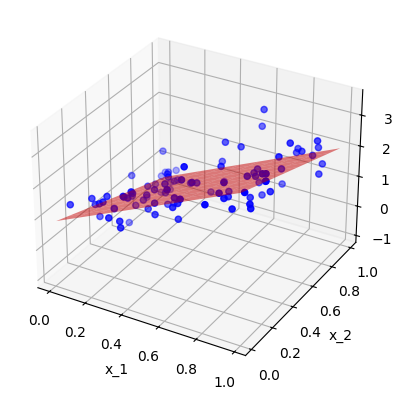

In [8]:
draw(X, y, w_2, b_2)

## 3. 梯度下降优化RMSE
梯度下降法是通过迭代更新回归系数，使得目标函数（如均方根误差 RMSE）逐渐减小。RMSE 的定义为：
$$ 
RMSE = \sqrt{\frac{1}{m}\sum^m_1(y_i-\hat y_i)^2}
$$
为了优化RMSE，我们对参数$w'$的更新规则为
$$
\boldsymbol{w'} = \boldsymbol{w'} - \alpha \frac{\partial RMSE}{\partial \boldsymbol {w'}}
$$
其中$\alpha$是学习率，梯度为：
$$
\frac{\partial RMSE}{\partial \boldsymbol {w'}} = -\frac{1}{mRMSE}X^T(y-X'w')
$$
通过不断迭代更新$w'$，可逼近最优解。

In [9]:
# 梯度下降法
def gradient_descent(X, y, learning_rate=0.1, n_iterations=1000):
    m = len(y)
    epsilon = 1e-8  # 防止除零
    X_b = np.c_[np.ones((m, 1)), X]  # 添加截距项
    w = np.random.randn(X_b.shape[1])  # 随机初始化参数

    for iteration in range(n_iterations):
        # 预测值
        y_pred = X_b.dot(w)
        # 残差
        residuals = y - y_pred
        # 计算RMSE
        rmse = np.sqrt(np.sum(residuals ** 2) / m) + epsilon
        # 计算梯度
        gradients = -1 / (m * rmse) * X_b.T.dot(residuals)
        # 更新参数
        w = w - learning_rate * gradients

    return w[1:], w[0]  # 返回回归系数和截距


w_3, b_3 = gradient_descent(X, y)
print("手写梯度下降法的回归系数：", w_3, b_3)


手写梯度下降法的回归系数： [ 2.66932111 -1.52254438] 0.8861513439018972


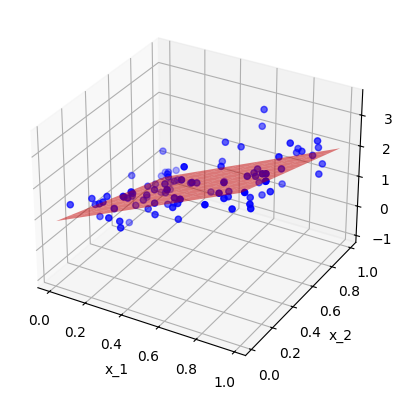

In [10]:
draw(X, y, w_3, b_3)